## Aluno: Airton Silva Monteiro

## Gradient Descent Algorithm

### Computing the minimum of a function

Suppose we want to find the minimum of the function

$f(x,y) = (x-47)^2 + (y-0.1)^2 + 2$

In [2]:
#Importanto Dependências
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

Create the functions for our calculations such as $f$ and the gradient of $f$.

In [3]:
#------------------------
# Create functions
#------------------------
# Input into the fuctions is vector X, where X = (x,y)
# Create the function we want to find the minimum of
def f(X):
    #TODO: implement this part of code
    #Resolução
    x, y = X
    f = (x-47)**2 + (y-0.1)**2 + 2
    return f
# Create the gradient vector
def gradf(X):
    #TODO: implement this part of code
    #Resolução
    x, y = X
    df_dx = 2*(x - 47)
    df_dy = 2*(y - 0.1)
    grad_f = np.array([df_dx, df_dy])
    return grad_f

### Plotting f

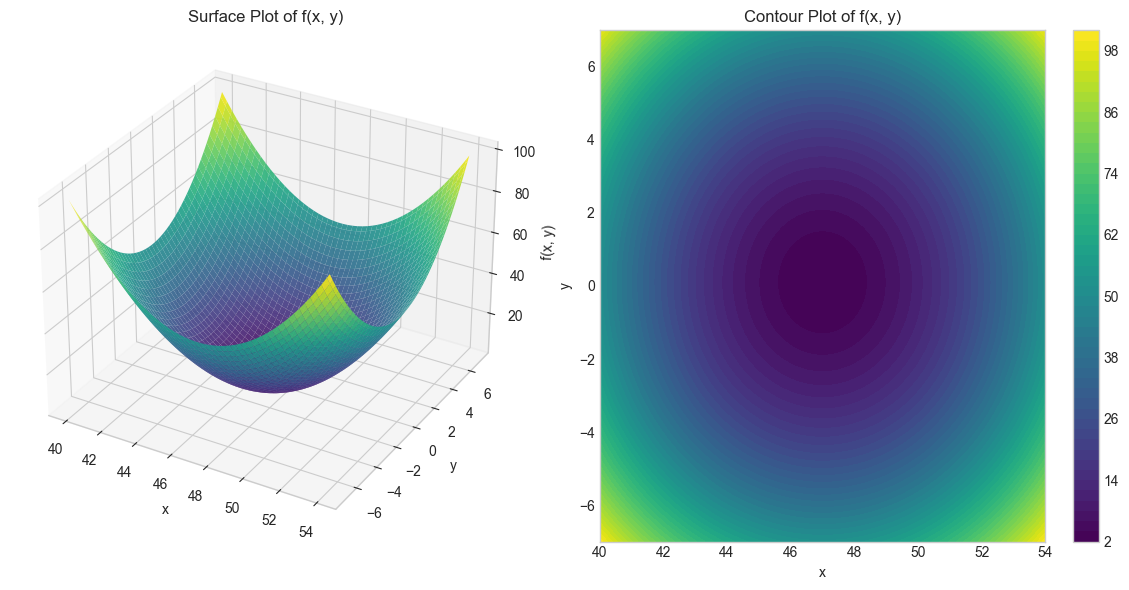

In [4]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(40, 54, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)
X_dots = X, Y
f_x = f(X_dots)

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, f_x, cmap='viridis', alpha=0.9)
ax.set_title('Surface Plot of f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X, Y, f_x, levels=50, cmap='viridis')
plt.colorbar(contour, ax=ax2)
ax2.set_title('Contour Plot of f(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

Starting the gradient descent algorithm. Here, we will start at the point $P = (80,20)$

In [5]:
def gradient_descent(grad_func, start_point, learning_rate=0.1, tolerance=1e-6, max_iterations=1000):
    point = np.array(start_point, dtype=float)
    points = [point.copy()]

    for i in range(max_iterations):
        grad = grad_func(point)
        grad_norm = np.linalg.norm(grad)

        if grad_norm < tolerance:
            print(f'Converged in {i} iterations.')
            break

        point -= learning_rate * grad
        points.append(point.copy())

    return points

In [6]:
start_points = [80,20]

eval = gradient_descent(gradf, start_points, learning_rate=0.1)

eval = np.array(eval)

print(f'Final point: {eval[-1]}')
print(f'Function value at final point: {f(eval[-1])}')



Converged in 82 iterations.
Final point: [47.00000037  0.10000023]
Function value at final point: 2.00000000000019


In [7]:
df_points = pd.DataFrame(eval, columns=['x', 'y'])

print(df_points)

            x          y
0   80.000000  20.000000
1   73.400000  16.020000
2   68.120000  12.836000
3   63.896000  10.288800
4   60.516800   8.251040
..        ...        ...
78  47.000001   0.100001
79  47.000001   0.100000
80  47.000001   0.100000
81  47.000000   0.100000
82  47.000000   0.100000

[83 rows x 2 columns]


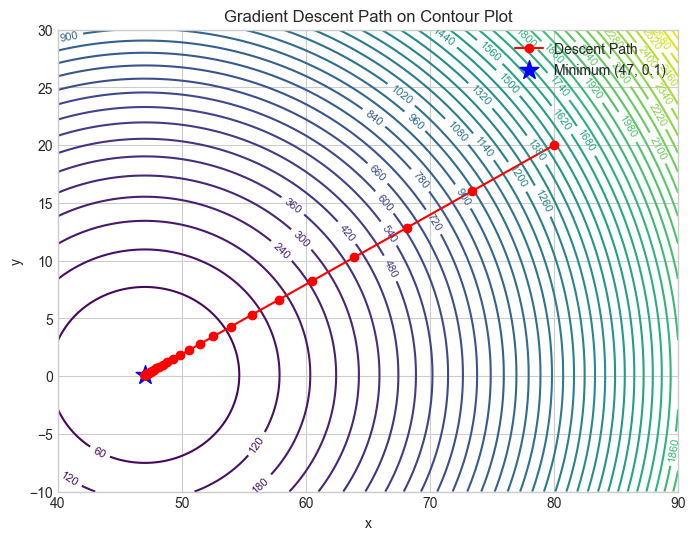

In [8]:
x = np.linspace(40, 90, 400)
y = np.linspace(-10, 30, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 47)**2 + (Y - 0.1)**2 + 2

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Gradient Descent Path on Contour Plot')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(df_points['x'], df_points['y'], marker='o', color='red', label='Descent Path')
plt.scatter(47, 0.1, color='blue', marker='*', s=200, label='Minimum (47, 0.1)')
plt.legend()
plt.grid(True)
plt.show()


### Finding the Optimal Step Size for Gradient Descent

### Symbolic Calculation of Optimal Step Size

We want to find the optimal step size $\alpha$
 for a single gradient descent step from our starting point $x_0 = (80,20)$
. We use symbolic mathematics to derive an exact solution.

First, we define our objective function:
$\begin{equation}
f(x,y) = (x-47)^2 + (y-0.1)^2 + 2
\end{equation}$


The gradient of this function is:
$\begin{equation}
\nabla f(x) = \begin{bmatrix}2(x-47)\\
2(y-0.1)\end{bmatrix}
\end{equation}$

For our starting point $x_0 = (80, 20)$, the gradient is:

$\begin{equation}
\nabla f(x_0) = \begin{bmatrix}2(x-47)\\
2(y-0.1)\end{bmatrix}
= \begin{bmatrix}66\\ 
39.8
\end{bmatrix}
\end{equation}$

The next point in gradient descent is given by:
$\begin{equation}
x_1 = x_0 - \alpha \nabla f(x_0)
\end{equation}$

Substituting our values:
$\begin{equation}
x_1 = \begin{bmatrix} 80\\
20
\end{bmatrix} - \alpha \begin{bmatrix}
66\\
39.8
\end{bmatrix} = \begin{bmatrix}
80-60\alpha\\
20-39.8\alpha
\end{bmatrix}
\end{equation}$

Now we define a function $\phi(\alpha)$ wich is our objective function evaluated at $x_1$:

$\phi(\alpha)=f(x_1) = (80 - 66\alpha -47)^2 + (20 - 39.8\alpha - 0.1)^2 + 2$

Simplifying:

$\phi(\alpha) = (33 - 66\alpha)^2 + (19.9 - 39.8)^2 + 2$

To find the optimal $\alpha$, we take the derivative of $\phi(\alpha)$ with respect to $\alpha$ and set it to zero:

$\begin{equation}
\frac{d\phi}{d\alpha} = -2 \cdot 66 \cdot (33-66 \alpha) - 2 \cdot 39.8 \cdot (19.9 - 39.8 \alpha) = 0
\end{equation}$

Simplifying:

$\begin{align}
    -132(33-66\alpha)-79.6(19.9-39.8\alpha) = 0 \\
    -4356 + 8712\alpha - 1584.04 + 3168.08\alpha = 0\\
    11880.08\alpha = 5940.04\\
    \alpha = 0.5   
\end{align}$

Therefore, the optimal step size for the first iteration of gradient descent is 0.5.

### Creating a function that perform the GD algorithm

### Implement the GD algorithm, with option 

In [9]:
def gradient_descent(f, grad_f, x0, alpha_type='fixed', alpha=0.01, 
                     max_steps=1000, tolerance=0.0001, 
                     c1=1e-4, rho=0.5, max_line_search_iter=20):
    """
    Gradient descent optimization algorithm.
    
    Parameters:
    -----------
    f : function
        The objective function to minimize, should take a numpy array as input.
    grad_f : function
        The gradient of the objective function, should take a numpy array as input.
    x0 : numpy array
        The starting point.
    alpha_type : str, optional
        Type of step size: 'fixed' or 'backtracking'. Default is 'fixed'.
    alpha : float, optional
        Step size for fixed alpha. Default is 0.01.
    max_steps : int, optional
        Maximum number of iterations. Default is 1000.
    tolerance : float, optional
        Convergence tolerance based on the norm of the difference. Default is 0.0001.
    c1 : float, optional
        Parameter for the Armijo condition in backtracking line search. Default is 1e-4.
    rho : float, optional
        Step size reduction factor for backtracking line search. Default is 0.5.
    max_line_search_iter : int, optional
        Maximum number of backtracking iterations. Default is 20.
        
    Returns:
    --------
    X : numpy array
        The final solution point.
    f_values : list
        Function values at each iteration.
    path : list of numpy arrays
        The path taken by the algorithm.
    num_steps : int
        Number of steps taken to converge.
""" 
    #TODO: implement this part of code
    #Resolução
    x = np.array(x0, dtype=float)
    f_values = [f(x)]
    path = [x.copy()]
    num_steps = 0

    for step in range(max_steps):
        grad = grad_f(x)
        current_alpha = alpha

        if alpha_type == 'backtracking':
            current_alpha = alpha
            fx = f(x)
            grad_norm_sq = np.dot(grad, grad)
            for _ in range(max_line_search_iter):
                x_next_candidate = x - current_alpha * grad
                if f(x_next_candidate) <= fx -c1 * current_alpha *grad_norm_sq:
                    break
                current_alpha *= rho
            else:
                 print("Backtracking line search failed to find a suitable step size.")

                 pass
        x_new = x - current_alpha * grad
        f_values.append(f(x_new))
        path.append(x_new.copy())
        num_steps += 1

        if np.linalg.norm(x_new - x) < tolerance:

            x = x_new
            break

        x_new
    else:
        pass
    
    return x, f_values, path, num_steps

In [13]:
# Example usage:
# Define your function and its gradient
def f_example(X):
    x, y = X
    return (x-47)**2 + (y-0.1)**2 + 2

def grad_f_example(X):
    x, y = X
    return np.array([2*(x-47), 2*(y-0.1)])

#TODO: implement this part of code
#Resolução

#Pontos Iniciais
initial_point = np.array([0.0, 0.0])

learning_rate_fixed = 0.1
learning_rate_backtracking_initial = 1.0
max_iterations = 1000
convergence_tolerance = 1e-6

print("Gradient Descent (Fixed Step Size:)")
solution_fixed, f_values_fixed, path_fixed, steps_fixed = gradient_descent(
    f=f_example,
    grad_f=grad_f_example,
    x0=initial_point,
    alpha_type='fixed',
    alpha=learning_rate_fixed,
    max_steps=max_iterations,
    tolerance=convergence_tolerance
)

print(f"Starting point: {initial_point}")
print(f"Optimal solution (Fixed Alpha): {solution_fixed}")
print(f"Function value at solution: {f_values_fixed[-1]:.6f}") # f_example(solution_fixed)
print(f"Number of steps taken: {steps_fixed}")
print(f"Expected minimum at [47, 0.1] with function value 2.0")

print("\nGradient Descent (Backtracking):")
solution_backtracking, f_values_backtracking, path_backtracking, steps_backtracking = gradient_descent(
    f=f_example,
    grad_f=grad_f_example,
    x0=initial_point,
    alpha_type='backtracking',
    alpha=learning_rate_backtracking_initial, # This is the initial alpha for backtracking
    max_steps=max_iterations,
    tolerance=convergence_tolerance,
    c1=1e-4,       # Armijo condition parameter
    rho=0.5        # Step size reduction factor
)

print(f"Starting point: {initial_point}")
print(f"Optimal solution (Backtracking): {solution_backtracking}")
print(f"Function value at solution: {f_values_backtracking[-1]:.6f}") # f_example(solution_backtracking)
print(f"Number of steps taken: {steps_backtracking}")
print(f"Expected minimum at [47, 0.1] with function value 2.0")

initial_point_2 = np.array([50.0, -10.0])
print("\nGradient Descent (Backtracking -- different start)")
solution_bt_2, f_vals_bt_2, _, steps_bt_2 = gradient_descent(
    f_example, grad_f_example, initial_point_2,
    alpha_type='backtracking', alpha=1.0,
    max_steps=max_iterations, tolerance=convergence_tolerance
)

print(f"\n")
print(f"Starting point: {initial_point_2}")
print(f"Optimal solution (Backtracking): {solution_bt_2}")
print(f"Function value at solution: {f_vals_bt_2[-1]:.6f}")
print(f"Number of steps taken: {steps_bt_2}")



Gradient Descent (Fixed Step Size:)
Starting point: [0. 0.]
Optimal solution (Fixed Alpha): [0. 0.]
Function value at solution: 1415.766400
Number of steps taken: 1000
Expected minimum at [47, 0.1] with function value 2.0

Gradient Descent (Backtracking):
Starting point: [0. 0.]
Optimal solution (Backtracking): [0. 0.]
Function value at solution: 2.000000
Number of steps taken: 1000
Expected minimum at [47, 0.1] with function value 2.0

Gradient Descent (Backtracking -- different start)


Starting point: [ 50. -10.]
Optimal solution (Backtracking): [ 50. -10.]
Function value at solution: 2.000000
Number of steps taken: 1000


### Show the results of your method for the following cases:

$\begin{align}
f(x)=\sum^{n-1}_{i=1} [100(x_{i+1}-x_i^2)^2 + (1-x_i)^2], n=5\\
f(x,y) = (x+2y-7)^2 + (2x + y -5)^2\\
f(x,y) = (x+2y-7)^2 + (2x + y -5)^2\\
f(x,y)=2x^2 -1.05x^4 + \frac{x^6}{6} + xy + y^2\\
f(x,y) = \sin(x+y) + (x-y)^2 -1.5x + 2.5y + 1\end{align}$

You need to test, for all cases:

different values for fixed alpha, different initial points.

backtracking line search, only 1 initial point for each function, Armijo and Wolfe Conditions.

present the results in a nice visual format.

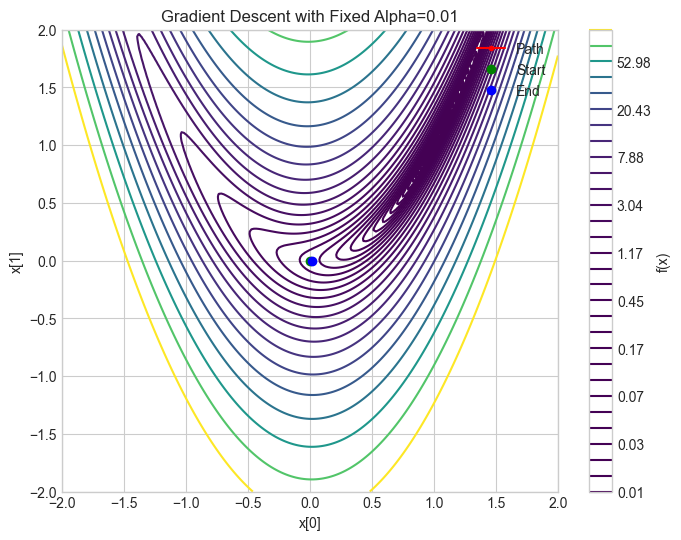

In [15]:
#Function to calculate Gradient of given function
#Using Forward Difference Method
def plot_convergence_path(objective_func, path, title, x_range, y_range):
    plt.figure(figsize=(8, 6))
    x_pts = np.array([p[0] for p in path])
    y_pts = np.array([p[1] for p in path])

    # Create a contour plot of the objective function
    x_contour = np.linspace(x_range[0], x_range[1], 200)
    y_contour = np.linspace(y_range[0], y_range[1], 200)
    X_contour, Y_contour = np.meshgrid(x_contour, y_contour)
    Z_contour = np.zeros_like(X_contour)
    for i in range(X_contour.shape[0]):
        for j in range(X_contour.shape[1]):
            Z_contour[i,j] = objective_func(np.array([X_contour[i,j], Y_contour[i,j]]))

    plt.contour(X_contour, Y_contour, Z_contour, levels=np.logspace(np.log10(0.01), np.log10(100), 30), cmap='viridis') # Adjust levels as needed
    plt.plot(x_pts, y_pts, 'r-o', label='Path', markersize=3) # Plot the path
    plt.plot(x_pts[0], y_pts[0], 'go', label='Start') # Start point
    plt.plot(x_pts[-1], y_pts[-1], 'bo', label='End') # End point
    plt.title(title)
    plt.xlabel("x[0]")
    plt.ylabel("x[1]")
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.legend()
    plt.colorbar(label='f(x)')
    plt.show()

def grad(x):                    
    value = np.zeros(len(x))    
    xd = x.copy()
    h = 10**-6
    for j in range(len(x)):
        xd[j] = x[j] + h
        value[j] = (func(xd) - func(x))/h
        xd = x.copy()
    return value
 
#Function for calculating Function Value 
def func(x):                     
    return 20*(x[1] - x[0]**2)**2 + (1 - x[0])**2

result = gradient_descent(func, grad, [0, 0], alpha_type='fixed', alpha=0.01)
plot_convergence_path(func, result[2], "Gradient Descent with Fixed Alpha=0.01", x_range = [-2,2], y_range = [-2,2])

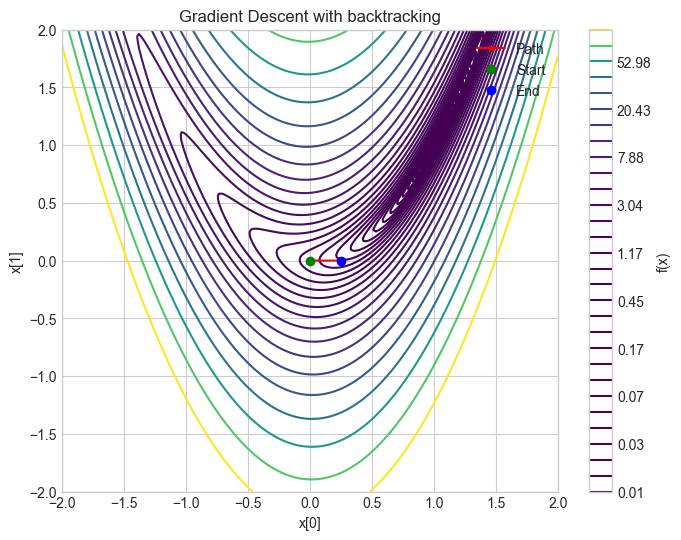

In [16]:
result = gradient_descent(func, grad, [0, 0], alpha_type='backtracking', alpha=1.0)
plot_convergence_path(func, result[2], "Gradient Descent with backtracking", x_range = [-2,2], y_range = [-2,2])